In [1]:
import re

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import os
import zipfile
import xlrd
import plotly.express as px
import re

sns.set(rc={'figure.figsize': (16,6)}, style='whitegrid')

In [2]:
df = pd.read_csv(r'datasets/1_games.csv')

In [3]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [16]:
df.head(10)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [17]:
df.dtypes

rank              int64
name             object
platform         object
year              int64
genre            object
publisher        object
na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
global_sales    float64
dtype: object

In [18]:
df.isna().sum()

rank            0
name            0
platform        0
year            0
genre           0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

In [19]:
df.shape

(16291, 11)

In [20]:
df = df.dropna()

In [21]:
df.isna().sum()

rank            0
name            0
platform        0
year            0
genre           0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

In [22]:
df.shape

(16291, 11)

In [23]:
df.columns

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

In [24]:
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [25]:
df['year'] = df['year'].astype('int')

In [26]:
df_year = df['year'].value_counts().sort_index(ascending=True).reset_index()

In [27]:
df_year

,year,count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


In [28]:
df_year.shape

(39, 2)

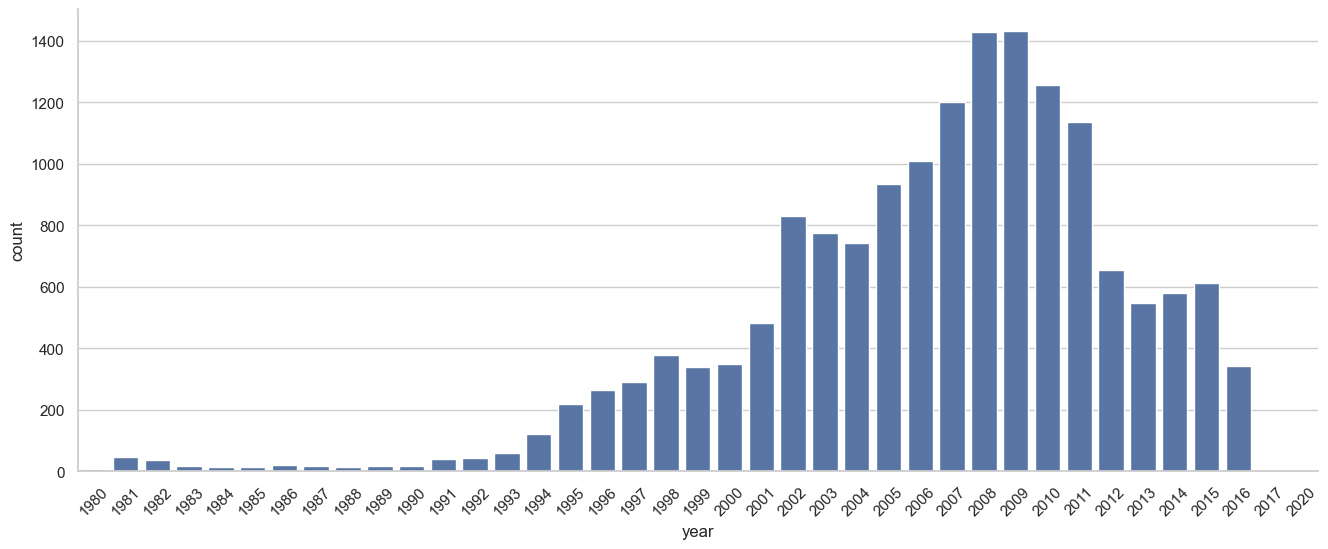

In [29]:
sns.countplot(x=df.year)
plt.xticks(rotation=45)
sns.despine()

In [30]:
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [31]:
df_game = df.groupby('platform', as_index=False) \
    .agg({'rank':'count'}) \
    .sort_values(by='rank', ascending=False).head(10)

In [32]:
df_game

,platform,rank
4,DS,2131
16,PS2,2127
17,PS3,1304
26,Wii,1290
28,X360,1234
19,PSP,1197
15,PS,1189
13,PC,938
29,XB,803
6,GBA,786


In [33]:
df_game.shape

(10, 2)

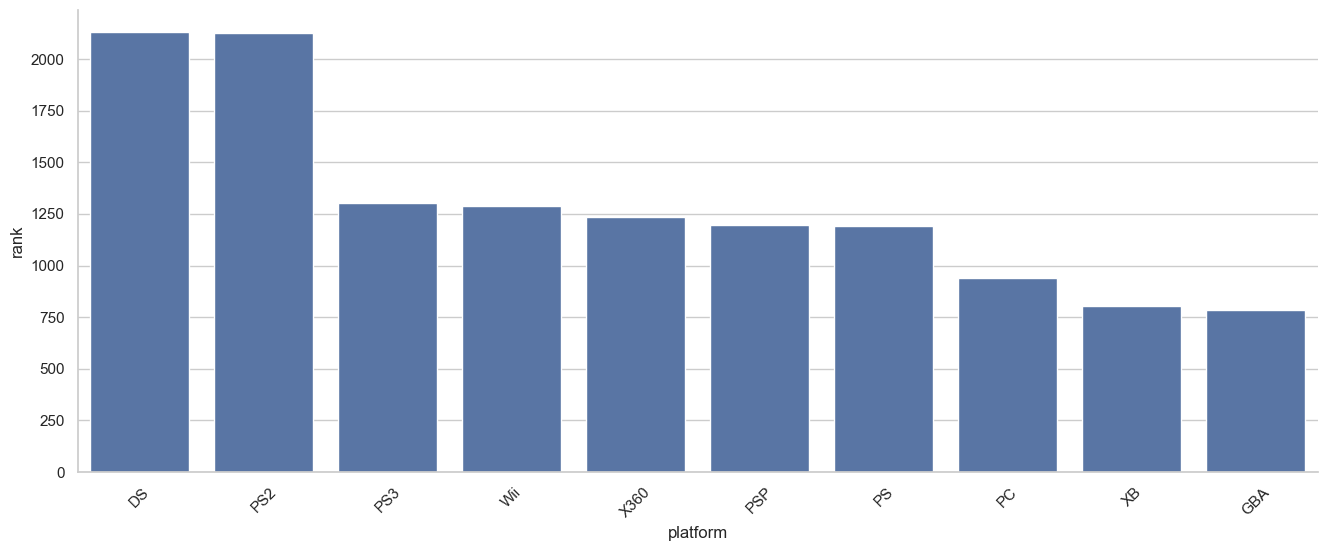

In [34]:
sns.barplot(data = df_game, x='platform', y='rank')
plt.xticks(rotation=45)
sns.despine()

In [35]:
games = df.platform.value_counts(normalize=True).mul(100).reset_index()

In [36]:
games

,platform,proportion
0,DS,13.080842
1,PS2,13.056289
2,PS3,8.004420
3,Wii,7.918483
4,X360,7.574735
5,PSP,7.347615
6,PS,7.298508
7,PC,5.757780
8,XB,4.929102
9,GBA,4.824750


In [37]:
games.dtypes

platform       object
proportion    float64
dtype: object

<Axes: xlabel='platform', ylabel='proportion'>

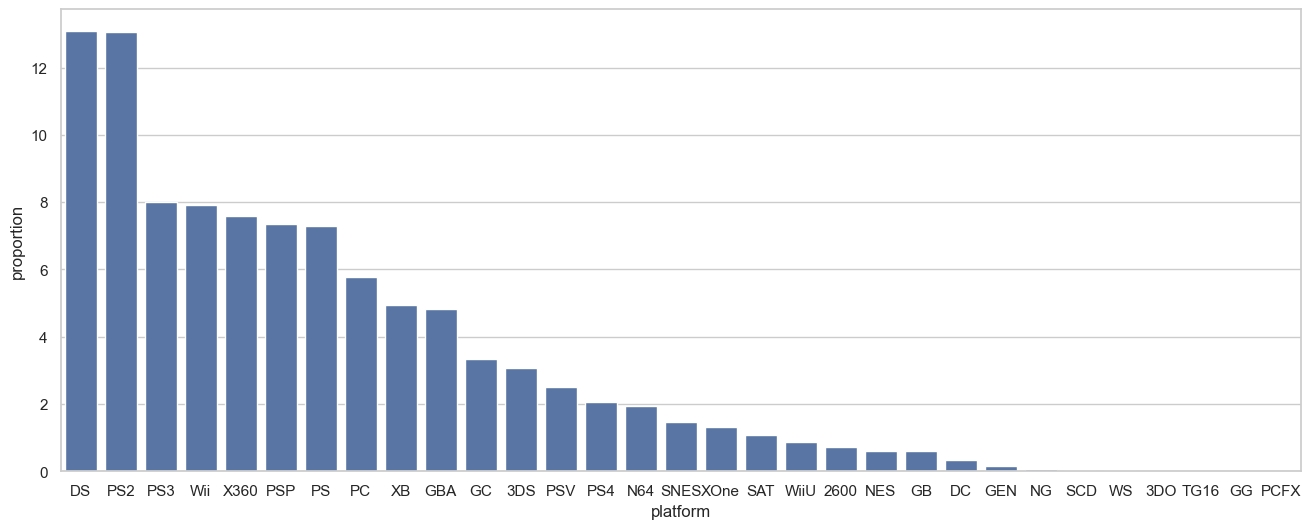

In [38]:
sns.barplot(data=games, x='platform', y='proportion')

In [39]:
games.query('proportion >= 7').platform.to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

In [40]:
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [41]:
df.publisher.value_counts().reset_index()

,publisher,count
0,Electronic Arts,1339
1,Activision,966
2,Namco Bandai Games,928
3,Ubisoft,918
4,Konami Digital Entertainment,823
...,...,...
571,King Records,1
572,Graphsim Entertainment,1
573,Takuyo,1
574,Inti Creates,1


In [42]:
df.publisher.describe()

count               16291
unique                576
top       Electronic Arts
freq                 1339
Name: publisher, dtype: object

In [43]:
df.query('publisher == "Nintendo"')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']].agg(['mean', 'std', 'median'])

,na_sales,eu_sales,jp_sales,other_sales,global_sales
mean,1.172055,0.601006,0.653721,0.136767,2.563836
std,2.989913,1.743953,1.063110,0.464170,5.676925
median,0.375000,0.120000,0.280000,0.030000,0.920000


In [44]:
nin = df.query('publisher == "Nintendo"') \
    .groupby(['genre', 'jp_sales']) \
    .platform.value_counts() \
    .reset_index()

In [45]:
nin

,genre,jp_sales,platform,count
0,Action,0.00,GBA,3
1,Action,0.00,GC,2
2,Action,0.00,WiiU,2
3,Action,0.00,3DS,1
4,Action,0.01,3DS,1
...,...,...,...,...
623,Strategy,0.89,GB,1
624,Strategy,0.94,N64,1
625,Strategy,1.13,N64,1
626,Strategy,1.37,N64,1


<Axes: xlabel='genre', ylabel='jp_sales'>

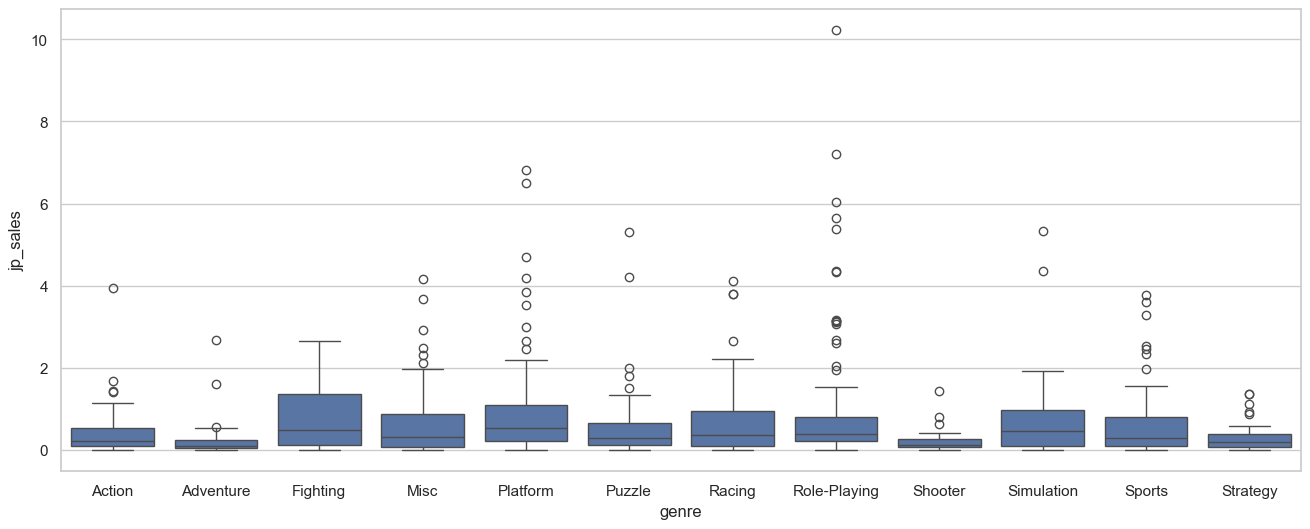

In [64]:
sns.boxplot(data=nin, x='genre', y='jp_sales')

<Axes: xlabel='genre', ylabel='jp_sales'>

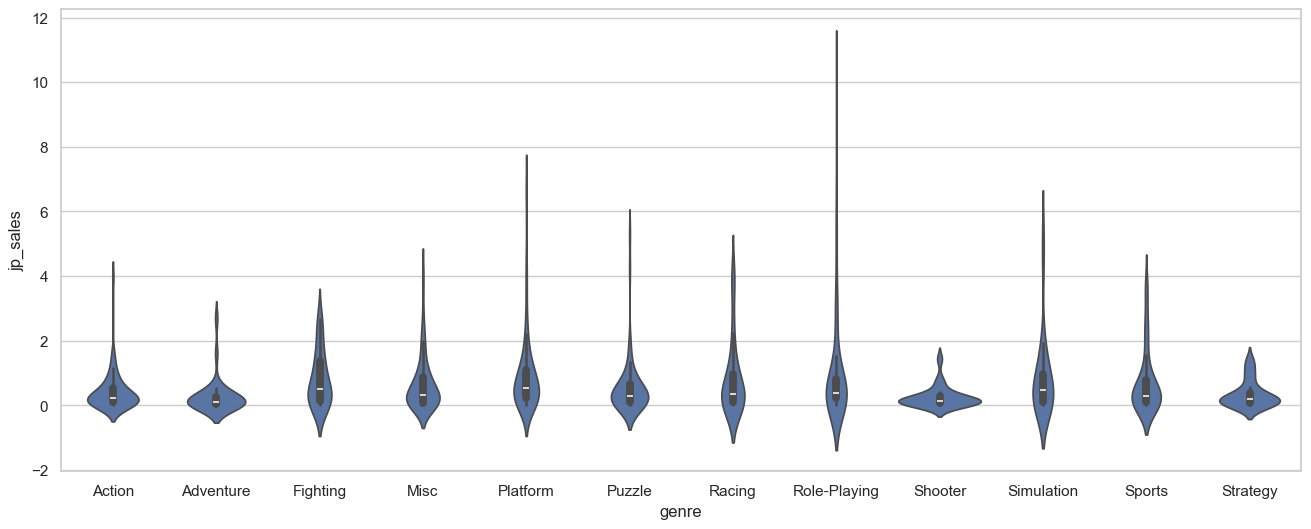

In [47]:
sns.violinplot(data=nin, x='genre', y='jp_sales')

C:\Users\Илья\Desktop\lesson\venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 24.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Илья\Desktop\lesson\venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Илья\Desktop\lesson\venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Илья\Desktop\lesson\venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Илья\Desktop\lesson\venv\Lib\site-packages\seaborn\categori

<Axes: xlabel='genre', ylabel='jp_sales'>

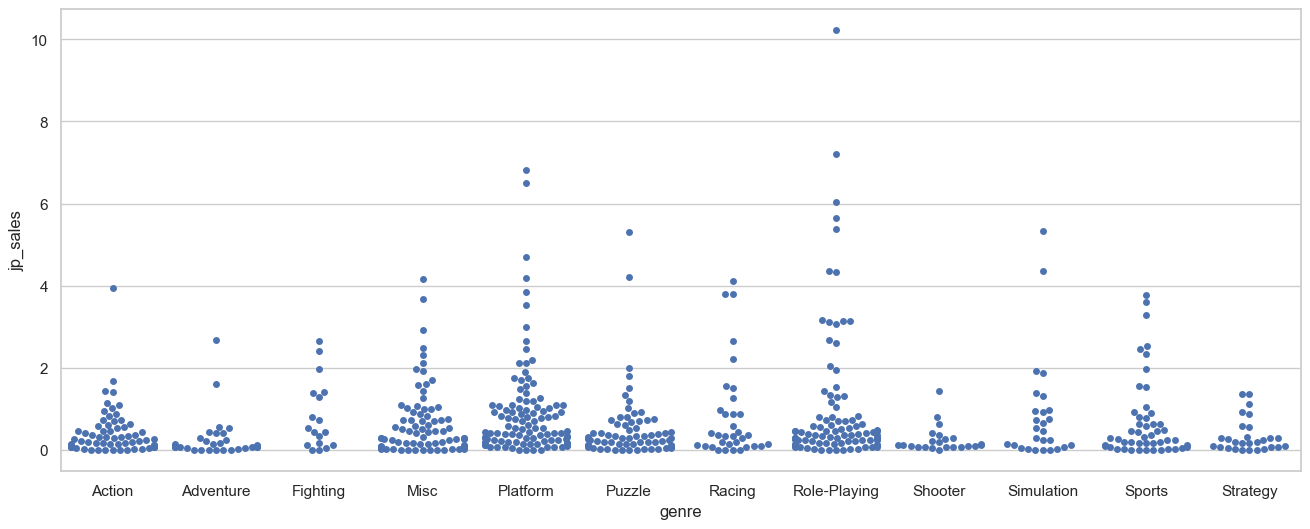

In [48]:
sns.swarmplot(data=nin, x='genre', y='jp_sales')

In [49]:
df1 = pd.read_csv(r'datasets/1_games.csv')

In [52]:
df1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [53]:
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [54]:
df.shape

(16291, 11)

In [57]:
year_df = df.query('genre in ("Fighting", "Simulation", "Platform", "Racing", "Sports")  and publisher == "Nintendo"') \
    .groupby(['genre', 'year']) \
    .global_sales.sum() \
    .reset_index()

In [58]:
year_df

,genre,year,global_sales
0,Fighting,1987,5.42
1,Fighting,1993,2.00
2,Fighting,1995,3.20
3,Fighting,1996,0.99
4,Fighting,1999,5.55
...,...,...,...
109,Sports,2010,2.18
110,Sports,2012,1.05
111,Sports,2013,1.69
112,Sports,2014,0.88


<Axes: xlabel='year', ylabel='global_sales'>

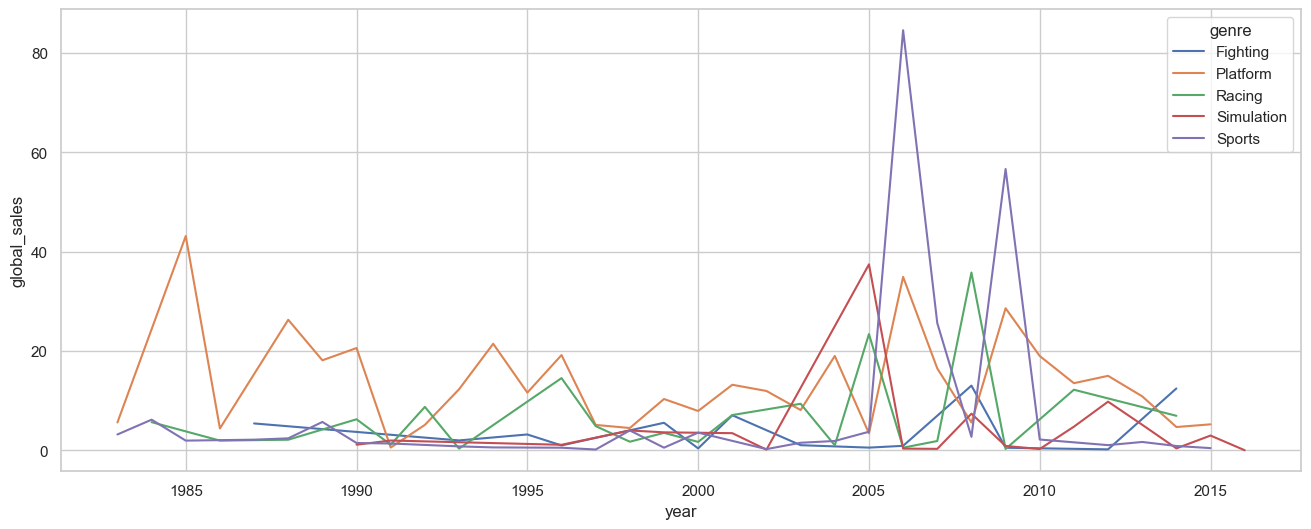

In [63]:
sns.lineplot(data=year_df, x='year', y='global_sales', hue='genre')